# Exsistance of Mussel using multiclass classfication algorithm

In this analysis, I will be using few multiclass classification algorithms to predict the existance of mussels based on given conditions. The algorithms that will be used in this project are KNN, Decision Tree, SVM, and Logistic Regression. The accuracy of each model will be calculated using Jaccard index, F1-score, and LogLoss. The best method will be chosen using the best accuracy. The rank order parameters will be then displayed to understand the affecting parameters on the existance of mussles in a given location. 

## Import neccessary packages 

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Load data

#### Load 2014 data

In [2]:
df_2014 = pd.read_csv('Y2014.csv')
df_2014.head()

,station,_TYPE_,_FREQ_,ID,replicate,dreiss_pc_cover,dreiss_pc_shells,D_all_num_m2,D_bug_num_m2,D_poly_num_m2,...,g_chlrat_m2,recnum,pressure_prf_x,pH_prf_x,cond_prf_x,cond_25_prf_x,o2_mg,turb_amt_prf_x,temperature_amt_prf_x,pco2_prf_x
0,97.0,0,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,69.5,1.383582,8.248507,108.221676,114.306242,NaN,1.279925,22.198582,98.166269
1,98.0,0,141,2.0,2.0,0.333333,1.500000,8.888800,0.0000,8.888800,...,0.039114,73.0,1.333333,7.836454,154.638203,177.198436,NaN,0.837730,18.299149,100.148298
2,99.0,0,136,4.0,2.0,8.500000,0.500000,2104.423400,1971.0914,133.332000,...,0.010458,70.5,1.991176,7.188015,159.662146,181.804062,NaN,0.401397,18.590000,104.510221
3,191.0,0,192,7.0,2.0,0.333333,1.833333,206.555333,193.2220,13.333333,...,0.089908,98.5,4.404167,7.589479,155.868274,178.914438,NaN,0.334688,18.220469,104.230729
4,192.0,0,405,9.0,2.0,0.333333,2.000000,11.111000,0.0000,11.111000,...,0.027842,205.0,6.130617,7.714420,151.869739,180.578174,NaN,0.246568,16.660000,108.548667


In [3]:
df_2014.columns

Index(['station', '_TYPE_', '_FREQ_', 'ID', 'replicate', 'dreiss_pc_cover',
       'dreiss_pc_shells', 'D_all_num_m2', 'D_bug_num_m2', 'D_poly_num_m2',
       'D_all_tbio_m2', 'D_all_sbio_m2', 'D_bug_tbio_m2', 'D_poly_tbio_m2',
       'D_bug_sbio_m2', 'D_poly_sbio_m2', 'pc_quagga_num', 'pc_quagga_tbio',
       'pc_zebra_num', 'lat_d', 'Lat_m', 'Lat_s', 'lon_d', 'lon_m', 'Lon_s',
       'zone', 'northing', 'easting', 'secchi', 'temp_top', 'temp_bot',
       'depth_g', 'year', 'date', 'month', 'day', 'goby_m2', 'station_full',
       'depth_b', 'depth_s', 'chlrat', 'mg_chlrat_m2', 'g_chlrat_m2', 'recnum',
       'pressure_prf_x', 'pH_prf_x', 'cond_prf_x', 'cond_25_prf_x', 'o2_mg',
       'turb_amt_prf_x', 'temperature_amt_prf_x', 'pco2_prf_x'],
      dtype='object')

#### Drop redunadant columns

In [4]:
df_2014.drop(['_TYPE_', '_FREQ_', 'ID', 'replicate', 'dreiss_pc_cover',
       'dreiss_pc_shells', 'D_bug_num_m2', 'D_poly_num_m2',
       'D_all_tbio_m2', 'D_all_sbio_m2', 'D_bug_tbio_m2', 'D_poly_tbio_m2',
       'D_bug_sbio_m2', 'D_poly_sbio_m2', 'pc_quagga_num', 'pc_quagga_tbio',
       'pc_zebra_num', 'lat_d', 'Lat_m', 'Lat_s', 'lon_d', 'lon_m', 'Lon_s',
       'zone', 'temp_top', 'temp_bot','cond_prf_x','date',
       'depth_g', 'goby_m2', 'station_full',
       'depth_s', 'chlrat', 'mg_chlrat_m2', 'g_chlrat_m2', 'recnum','o2_mg', 'pco2_prf_x'], axis=1, inplace=True)
df_2014.head()

,station,D_all_num_m2,northing,easting,secchi,year,month,day,depth_b,pressure_prf_x,pH_prf_x,cond_25_prf_x,turb_amt_prf_x,temperature_amt_prf_x
0,97.0,NaN,NaN,NaN,NaN,2014,7,10,NaN,1.383582,8.248507,114.306242,1.279925,22.198582
1,98.0,8.888800,5.044951e+06,539587.655076,-3.0,2014,7,9,3.766667,1.333333,7.836454,177.198436,0.837730,18.299149
2,99.0,2104.423400,5.041033e+06,537208.683739,-3.5,2014,7,8,3.333333,1.991176,7.188015,181.804062,0.401397,18.590000
3,191.0,206.555333,5.039817e+06,536660.418500,5.7,2014,7,8,8.000000,4.404167,7.589479,178.914438,0.334688,18.220469
4,192.0,11.111000,5.037710e+06,536349.311760,7.0,2014,7,8,11.500000,6.130617,7.714420,180.578174,0.246568,16.660000


#### Add another column to describe the substrate type. If substrate=1, it means hard substrate. If substrate =0, it means soft substrate. 

In [5]:
df_2014.shape

(50, 14)

In [6]:
df_2014['substrate']=np.ones(df_2014['station'].shape)

In [7]:
df_2014.head()

,station,D_all_num_m2,northing,easting,secchi,year,month,day,depth_b,pressure_prf_x,pH_prf_x,cond_25_prf_x,turb_amt_prf_x,temperature_amt_prf_x,substrate
0,97.0,NaN,NaN,NaN,NaN,2014,7,10,NaN,1.383582,8.248507,114.306242,1.279925,22.198582,1.0
1,98.0,8.888800,5.044951e+06,539587.655076,-3.0,2014,7,9,3.766667,1.333333,7.836454,177.198436,0.837730,18.299149,1.0
2,99.0,2104.423400,5.041033e+06,537208.683739,-3.5,2014,7,8,3.333333,1.991176,7.188015,181.804062,0.401397,18.590000,1.0
3,191.0,206.555333,5.039817e+06,536660.418500,5.7,2014,7,8,8.000000,4.404167,7.589479,178.914438,0.334688,18.220469,1.0
4,192.0,11.111000,5.037710e+06,536349.311760,7.0,2014,7,8,11.500000,6.130617,7.714420,180.578174,0.246568,16.660000,1.0


#### Laod 2015 data

In [8]:
df_2015 = pd.read_csv('Y2015.csv')
df_2015.head()

,Station,_FREQ_,secchi,Northing,Easting,month,day,dreibuge,dreipoly,Replicate,...,depth_b,recnum,pressure_prf_x,temp_prf_x,pH_prf_x,turbidity_prf_x,o2_percent_prf_x,cond_at_meaasure_temp_prfx,cond_25_prf_x,year
0,1048,632,2.3,5051135,544442,8,6,0.000000,0.0,2,...,13.3,318.5,7.868196,15.974130,7.128418,1.961076,38.592611,70.924142,85.526072,2015
1,1049,330,2.9,5049148,546265,8,6,0.000000,0.0,2,...,8.5,167.5,4.168485,22.452152,7.669273,1.480061,89.188182,123.697142,129.987355,2015
2,1050,454,4.5,5046948,543776,8,6,0.000000,0.0,2,...,13.8,229.5,6.577533,21.606189,8.217335,0.673700,99.517203,164.157752,175.483704,2015
3,1051,378,6.1,5045058,539431,8,6,44.566667,19.1,2,...,11.1,191.5,5.005026,20.340979,8.356243,0.631958,102.078201,168.291392,184.635344,2015
4,1052,375,3.8,5045197,547391,8,6,0.000000,0.0,2,...,11.6,190.0,5.746933,21.414347,8.271893,0.697093,100.075867,161.040300,172.841310,2015


In [9]:
df_2015.columns

Index(['Station', '_FREQ_', 'secchi', 'Northing', 'Easting', 'month', 'day',
       'dreibuge', 'dreipoly', 'Replicate', 'drie_tot', 'pc_buge', 'pc_zebra',
       'depth_s', 'depth_b', 'recnum', 'pressure_prf_x', 'temp_prf_x',
       'pH_prf_x', 'turbidity_prf_x', 'o2_percent_prf_x',
       'cond_at_meaasure_temp_prfx', 'cond_25_prf_x', 'year'],
      dtype='object')

#### Drop redundant columns

In [10]:
df_2015.drop(['_FREQ_', 
       'dreibuge', 'dreipoly', 'Replicate',  'pc_buge', 'pc_zebra',
       'depth_s',  'recnum', 'o2_percent_prf_x',
       'cond_at_meaasure_temp_prfx'], axis=1, inplace=True)


In [11]:
df_2015.head()

,Station,secchi,Northing,Easting,month,day,drie_tot,depth_b,pressure_prf_x,temp_prf_x,pH_prf_x,turbidity_prf_x,cond_25_prf_x,year
0,1048,2.3,5051135,544442,8,6,0.000000,13.3,7.868196,15.974130,7.128418,1.961076,85.526072,2015
1,1049,2.9,5049148,546265,8,6,0.000000,8.5,4.168485,22.452152,7.669273,1.480061,129.987355,2015
2,1050,4.5,5046948,543776,8,6,0.000000,13.8,6.577533,21.606189,8.217335,0.673700,175.483704,2015
3,1051,6.1,5045058,539431,8,6,63.666667,11.1,5.005026,20.340979,8.356243,0.631958,184.635344,2015
4,1052,3.8,5045197,547391,8,6,0.000000,11.6,5.746933,21.414347,8.271893,0.697093,172.841310,2015


#### add a column to describe the substrate type as in 2014 data.

In [12]:
df_2015.shape

(46, 14)

In [13]:
df_2015['substrate']=np.zeros(df_2015['Station'].shape)

In [14]:
df_2015.head()

,Station,secchi,Northing,Easting,month,day,drie_tot,depth_b,pressure_prf_x,temp_prf_x,pH_prf_x,turbidity_prf_x,cond_25_prf_x,year,substrate
0,1048,2.3,5051135,544442,8,6,0.000000,13.3,7.868196,15.974130,7.128418,1.961076,85.526072,2015,0.0
1,1049,2.9,5049148,546265,8,6,0.000000,8.5,4.168485,22.452152,7.669273,1.480061,129.987355,2015,0.0
2,1050,4.5,5046948,543776,8,6,0.000000,13.8,6.577533,21.606189,8.217335,0.673700,175.483704,2015,0.0
3,1051,6.1,5045058,539431,8,6,63.666667,11.1,5.005026,20.340979,8.356243,0.631958,184.635344,2015,0.0
4,1052,3.8,5045197,547391,8,6,0.000000,11.6,5.746933,21.414347,8.271893,0.697093,172.841310,2015,0.0


In [15]:
print(df_2014.columns)
print(df_2015.columns)

Index(['station', 'D_all_num_m2', 'northing', 'easting', 'secchi', 'year',
       'month', 'day', 'depth_b', 'pressure_prf_x', 'pH_prf_x',
       'cond_25_prf_x', 'turb_amt_prf_x', 'temperature_amt_prf_x',
       'substrate'],
      dtype='object')
Index(['Station', 'secchi', 'Northing', 'Easting', 'month', 'day', 'drie_tot',
       'depth_b', 'pressure_prf_x', 'temp_prf_x', 'pH_prf_x',
       'turbidity_prf_x', 'cond_25_prf_x', 'year', 'substrate'],
      dtype='object')


In [16]:
print(df_2014.shape)
print(df_2015.shape)

(50, 15)
(46, 15)


### Concatenation of two dataframes into one Pandas dataframe. 

#### Rename the column names in 2015 data so that concatenation of 2014 and 2015 data will be easy

In [17]:
df_2015.rename(columns={'Station':'station', 'Northing':'northing', 'Easting':'easting', 'drie_tot':'D_all_num_m2',
       'temp_prf_x':'temperature_amt_prf_x',
       'turbidity_prf_x':'turb_amt_prf_x'}, inplace=True)

#### concatenate two pandas dataframes df_2014 and df_2015. 

In [18]:
df=pd.concat([df_2014, df_2015], ignore_index=True, sort=False)

## Data cleaning

#### Check for NaN values

In [19]:
df.isna().sum()

station                  0
D_all_num_m2             3
northing                 3
easting                  3
secchi                   4
year                     0
month                    0
day                      0
depth_b                  3
pressure_prf_x           0
pH_prf_x                 0
cond_25_prf_x            0
turb_amt_prf_x           0
temperature_amt_prf_x    0
substrate                0
dtype: int64

In [20]:
# Now we drop the rows with NaNs to get the useful information
df.dropna(subset=['D_all_num_m2', 'secchi'], axis=0, inplace=True)

In [21]:
df.head()

,station,D_all_num_m2,northing,easting,secchi,year,month,day,depth_b,pressure_prf_x,pH_prf_x,cond_25_prf_x,turb_amt_prf_x,temperature_amt_prf_x,substrate
1,98.0,8.888800,5.044951e+06,539587.655076,-3.0,2014,7,9,3.766667,1.333333,7.836454,177.198436,0.837730,18.299149,1.0
2,99.0,2104.423400,5.041033e+06,537208.683739,-3.5,2014,7,8,3.333333,1.991176,7.188015,181.804062,0.401397,18.590000,1.0
3,191.0,206.555333,5.039817e+06,536660.418500,5.7,2014,7,8,8.000000,4.404167,7.589479,178.914438,0.334688,18.220469,1.0
4,192.0,11.111000,5.037710e+06,536349.311760,7.0,2014,7,8,11.500000,6.130617,7.714420,180.578174,0.246568,16.660000,1.0
5,193.0,4.444400,5.036447e+06,535045.341783,6.5,2014,7,9,18.300000,8.802712,7.526835,180.643414,0.247396,12.886998,1.0


#### Create a column with binary values to show the existance of mussels. If D_all_num_m2>0, the mussel availability> 0. The oppsite occurs when D_all_num_m2<=0. 

In [22]:
df['mussel_availability'] = np.where(df['D_all_num_m2']>=20, 'YES', 'NO')
df.head()

,station,D_all_num_m2,northing,easting,secchi,year,month,day,depth_b,pressure_prf_x,pH_prf_x,cond_25_prf_x,turb_amt_prf_x,temperature_amt_prf_x,substrate,mussel_availability
1,98.0,8.888800,5.044951e+06,539587.655076,-3.0,2014,7,9,3.766667,1.333333,7.836454,177.198436,0.837730,18.299149,1.0,NO
2,99.0,2104.423400,5.041033e+06,537208.683739,-3.5,2014,7,8,3.333333,1.991176,7.188015,181.804062,0.401397,18.590000,1.0,YES
3,191.0,206.555333,5.039817e+06,536660.418500,5.7,2014,7,8,8.000000,4.404167,7.589479,178.914438,0.334688,18.220469,1.0,YES
4,192.0,11.111000,5.037710e+06,536349.311760,7.0,2014,7,8,11.500000,6.130617,7.714420,180.578174,0.246568,16.660000,1.0,NO
5,193.0,4.444400,5.036447e+06,535045.341783,6.5,2014,7,9,18.300000,8.802712,7.526835,180.643414,0.247396,12.886998,1.0,NO


### Visualization of data

In [23]:
def func(xx):
    if xx == 0:
        return 'SOFT'
    elif xx == 1:
        return 'HARD'
    return 'UNDEFINED'

df['substrate_type'] = df['substrate'].apply(func)

In [24]:
df.head()

,station,D_all_num_m2,northing,easting,secchi,year,month,day,depth_b,pressure_prf_x,pH_prf_x,cond_25_prf_x,turb_amt_prf_x,temperature_amt_prf_x,substrate,mussel_availability,substrate_type
1,98.0,8.888800,5.044951e+06,539587.655076,-3.0,2014,7,9,3.766667,1.333333,7.836454,177.198436,0.837730,18.299149,1.0,NO,HARD
2,99.0,2104.423400,5.041033e+06,537208.683739,-3.5,2014,7,8,3.333333,1.991176,7.188015,181.804062,0.401397,18.590000,1.0,YES,HARD
3,191.0,206.555333,5.039817e+06,536660.418500,5.7,2014,7,8,8.000000,4.404167,7.589479,178.914438,0.334688,18.220469,1.0,YES,HARD
4,192.0,11.111000,5.037710e+06,536349.311760,7.0,2014,7,8,11.500000,6.130617,7.714420,180.578174,0.246568,16.660000,1.0,NO,HARD
5,193.0,4.444400,5.036447e+06,535045.341783,6.5,2014,7,9,18.300000,8.802712,7.526835,180.643414,0.247396,12.886998,1.0,NO,HARD


### Let's shuffle data

In [25]:
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace= True, drop=True)
df.head(50)

,station,D_all_num_m2,northing,easting,secchi,year,month,day,depth_b,pressure_prf_x,pH_prf_x,cond_25_prf_x,turb_amt_prf_x,temperature_amt_prf_x,substrate,mussel_availability,substrate_type
0,1076.0,0.000000,4.996385e+06,572152.000000,3.6,2015,8,12,6.900000,3.301688,8.081814,135.289708,0.724388,21.917131,0.0,NO,SOFT
1,1085.0,0.000000,4.971598e+06,587585.000000,4.5,2015,8,13,12.300000,5.958516,8.369231,169.144063,0.700632,21.600357,0.0,NO,SOFT
2,1065.0,534.800000,5.022428e+06,559518.000000,5.4,2015,8,16,6.100000,3.262199,8.308729,157.684772,0.644399,21.607698,0.0,YES,SOFT
3,740.0,615.666667,5.000487e+06,566260.010324,8.0,2014,7,21,17.800000,9.740096,7.960258,182.756830,0.169330,17.333914,1.0,YES,HARD
4,737.0,273.330600,5.000044e+06,570929.290545,4.2,2014,7,17,4.133333,2.137849,7.944542,143.208774,0.511753,19.508207,1.0,YES,HARD
5,1083.0,0.000000,4.981946e+06,582728.000000,3.9,2015,8,12,8.400000,3.984098,8.318899,169.229552,0.896881,22.035627,0.0,NO,SOFT
6,1074.0,0.000000,5.003956e+06,571669.000000,3.9,2015,8,11,20.600000,12.665492,7.664557,147.669376,0.693062,13.744362,0.0,NO,SOFT
7,196.0,741.999800,5.036136e+06,540839.631379,-4.4,2014,7,10,4.533333,2.149315,8.081301,181.395437,0.419110,18.342534,1.0,YES,HARD
8,1059.0,0.000000,5.024379e+06,553789.000000,7.5,2015,8,11,13.000000,5.907269,8.343855,179.759168,0.436608,19.821542,0.0,NO,SOFT
9,750.0,24.666667,4.984997e+06,580446.640562,-4.3,2014,7,23,4.233333,1.618696,7.609826,172.228283,0.631130,23.147478,1.0,YES,HARD


## Data Visualization

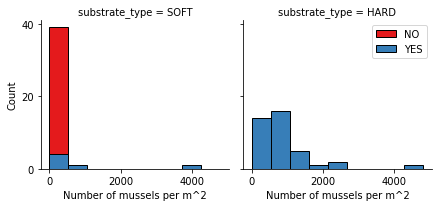

In [26]:
import seaborn as sns

bins = np.linspace(df.D_all_num_m2.min(), df.D_all_num_m2.max(), 10)
g = sns.FacetGrid(df, col="substrate_type", hue="mussel_availability", palette="Set1", col_wrap=2)
g.map(plt.hist, 'D_all_num_m2', bins=bins, ec="k")
g.axes[-1].legend()
g.set_axis_labels("Number of mussels per m^2", "Count")

plt.rcParams["figure.figsize"] = (16,9)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

plt.show()
g.savefig('Fig_substrate.png', bbox_inches='tight')

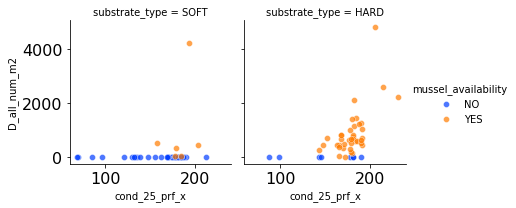

In [27]:
g = sns.FacetGrid(df, col="substrate_type", hue="mussel_availability", palette="bright", col_wrap=2)
g.map(sns.scatterplot, "cond_25_prf_x", "D_all_num_m2", alpha=.7)
g.add_legend()
plt.show()
g.savefig('Fig_K25.png', bbox_inches='tight')

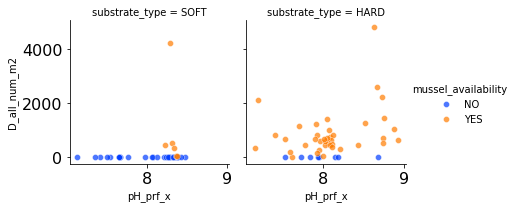

In [28]:
g = sns.FacetGrid(df, col="substrate_type", hue="mussel_availability",  palette="bright", col_wrap=2)
g.map(sns.scatterplot, "pH_prf_x", "D_all_num_m2", alpha=.7)
g.add_legend()
plt.show()
g.savefig('Fig_pH.png', bbox_inches='tight')

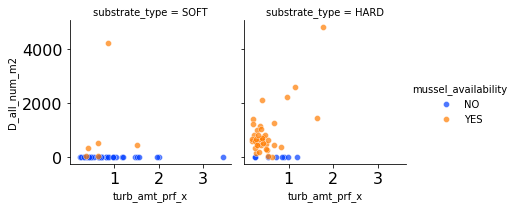

In [29]:

g = sns.FacetGrid(df, col="substrate_type", hue="mussel_availability",  palette="bright", col_wrap=2)
g.map(sns.scatterplot, "turb_amt_prf_x", "D_all_num_m2", alpha=.7)
g.add_legend()
plt.show()
g.savefig('Fig_turb.png', bbox_inches='tight')


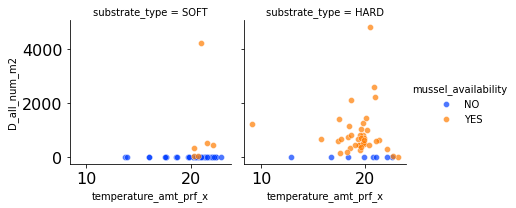

In [30]:

g = sns.FacetGrid(df, col="substrate_type", hue="mussel_availability",  palette="bright", col_wrap=2)
g.map(sns.scatterplot, "temperature_amt_prf_x", "D_all_num_m2", alpha=.7)
g.add_legend()
plt.show()
g.savefig('Fig_temp.png', bbox_inches='tight')

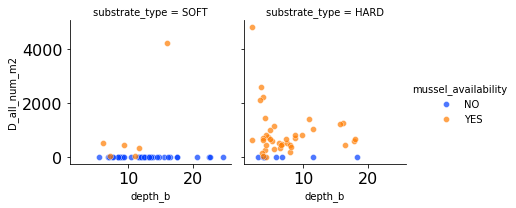

In [31]:
g = sns.FacetGrid(df, col="substrate_type", hue="mussel_availability",  palette="bright", col_wrap=2)
g.map(sns.scatterplot, "depth_b", "D_all_num_m2", alpha=.7)
g.add_legend()
plt.show()
g.savefig('Fig_depth_b.png', bbox_inches='tight')

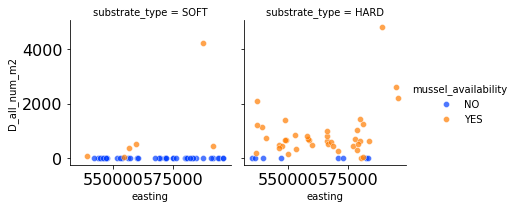

In [32]:
g = sns.FacetGrid(df, col="substrate_type", hue="mussel_availability",  palette="bright", col_wrap=2)
g.map(sns.scatterplot, "easting", "D_all_num_m2", alpha=.7)
g.add_legend()
plt.show()
g.savefig('Fig_easting.png', bbox_inches='tight')

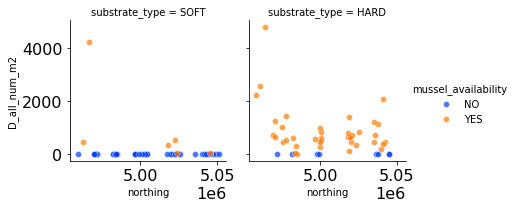

In [33]:
g = sns.FacetGrid(df, col="substrate_type", hue="mussel_availability",  palette="bright", col_wrap=2)
g.map(sns.scatterplot, "northing", "D_all_num_m2", alpha=.7)
g.add_legend()
plt.show()
g.savefig('Fig_northing.png', bbox_inches='tight')

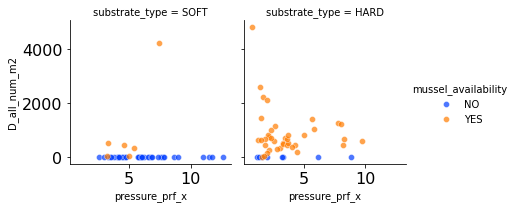

In [34]:
g = sns.FacetGrid(df, col="substrate_type", hue="mussel_availability", palette="bright", col_wrap=2)
g.map(sns.scatterplot, "pressure_prf_x", "D_all_num_m2", alpha=.7)
g.add_legend()
plt.show()
g.savefig('Fig_pressure.png', bbox_inches='tight')

### Create a copy of the dataframe. So that, it will be easy to refer back to the original dataframe if needed.

In [35]:
data=df.copy()
if 'station' in df:
    del data['station']
    del data['year']
    del data['month']
    del data['day']
    del data['substrate']

In [36]:
data.head()

,D_all_num_m2,northing,easting,secchi,depth_b,pressure_prf_x,pH_prf_x,cond_25_prf_x,turb_amt_prf_x,temperature_amt_prf_x,mussel_availability,substrate_type
0,0.000000,4.996385e+06,572152.000000,3.6,6.900000,3.301688,8.081814,135.289708,0.724388,21.917131,NO,SOFT
1,0.000000,4.971598e+06,587585.000000,4.5,12.300000,5.958516,8.369231,169.144063,0.700632,21.600357,NO,SOFT
2,534.800000,5.022428e+06,559518.000000,5.4,6.100000,3.262199,8.308729,157.684772,0.644399,21.607698,YES,SOFT
3,615.666667,5.000487e+06,566260.010324,8.0,17.800000,9.740096,7.960258,182.756830,0.169330,17.333914,YES,HARD
4,273.330600,5.000044e+06,570929.290545,4.2,4.133333,2.137849,7.944542,143.208774,0.511753,19.508207,YES,HARD


## correlation matrix

In [37]:
import seaborn as sns

#  Notice that the substrate_type column is not present in this matrix because it is not numeric. We will need to dummify htype to calculate correlation.
data_dummy = pd.get_dummies(data.substrate_type)
data = pd.concat([data, data_dummy], axis = 1)
data.head()

,D_all_num_m2,northing,easting,secchi,depth_b,pressure_prf_x,pH_prf_x,cond_25_prf_x,turb_amt_prf_x,temperature_amt_prf_x,mussel_availability,substrate_type,HARD,SOFT
0,0.000000,4.996385e+06,572152.000000,3.6,6.900000,3.301688,8.081814,135.289708,0.724388,21.917131,NO,SOFT,0,1
1,0.000000,4.971598e+06,587585.000000,4.5,12.300000,5.958516,8.369231,169.144063,0.700632,21.600357,NO,SOFT,0,1
2,534.800000,5.022428e+06,559518.000000,5.4,6.100000,3.262199,8.308729,157.684772,0.644399,21.607698,YES,SOFT,0,1
3,615.666667,5.000487e+06,566260.010324,8.0,17.800000,9.740096,7.960258,182.756830,0.169330,17.333914,YES,HARD,1,0
4,273.330600,5.000044e+06,570929.290545,4.2,4.133333,2.137849,7.944542,143.208774,0.511753,19.508207,YES,HARD,1,0


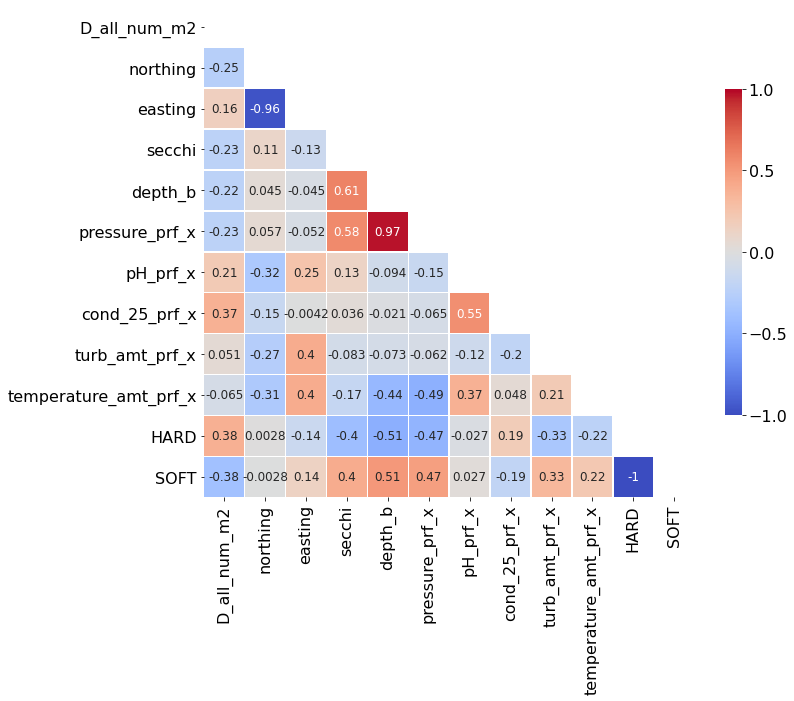

In [38]:
# correlation matrix
corr_matrix = data.corr()

# Set Up Mask To Hide Upper Triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# Create Heatmap in Seaborn
import seaborn as sns
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#
heatmap.get_figure().savefig('heatmap.png', bbox_inches='tight')

In [39]:
data.head()

,D_all_num_m2,northing,easting,secchi,depth_b,pressure_prf_x,pH_prf_x,cond_25_prf_x,turb_amt_prf_x,temperature_amt_prf_x,mussel_availability,substrate_type,HARD,SOFT
0,0.000000,4.996385e+06,572152.000000,3.6,6.900000,3.301688,8.081814,135.289708,0.724388,21.917131,NO,SOFT,0,1
1,0.000000,4.971598e+06,587585.000000,4.5,12.300000,5.958516,8.369231,169.144063,0.700632,21.600357,NO,SOFT,0,1
2,534.800000,5.022428e+06,559518.000000,5.4,6.100000,3.262199,8.308729,157.684772,0.644399,21.607698,YES,SOFT,0,1
3,615.666667,5.000487e+06,566260.010324,8.0,17.800000,9.740096,7.960258,182.756830,0.169330,17.333914,YES,HARD,1,0
4,273.330600,5.000044e+06,570929.290545,4.2,4.133333,2.137849,7.944542,143.208774,0.511753,19.508207,YES,HARD,1,0


In [40]:
# Lets remove the substrate column as it contains mixed data
data.drop(['substrate_type'], axis=1, inplace=True)

In [41]:
# Feature = pd.concat([Feature,pd.get_dummies(data['substrate_type'])], axis=1)
# Feature.head()
data.head()

,D_all_num_m2,northing,easting,secchi,depth_b,pressure_prf_x,pH_prf_x,cond_25_prf_x,turb_amt_prf_x,temperature_amt_prf_x,mussel_availability,HARD,SOFT
0,0.000000,4.996385e+06,572152.000000,3.6,6.900000,3.301688,8.081814,135.289708,0.724388,21.917131,NO,0,1
1,0.000000,4.971598e+06,587585.000000,4.5,12.300000,5.958516,8.369231,169.144063,0.700632,21.600357,NO,0,1
2,534.800000,5.022428e+06,559518.000000,5.4,6.100000,3.262199,8.308729,157.684772,0.644399,21.607698,YES,0,1
3,615.666667,5.000487e+06,566260.010324,8.0,17.800000,9.740096,7.960258,182.756830,0.169330,17.333914,YES,1,0
4,273.330600,5.000044e+06,570929.290545,4.2,4.133333,2.137849,7.944542,143.208774,0.511753,19.508207,YES,1,0


#### Finding whether data is balnced

In [42]:
# Let's look at the severity index
data['mussel_availability'].value_counts()

NO     47
YES    45
Name: mussel_availability, dtype: int64

## Feature Selection

In [43]:
#Check the dataframe for any NaNs
print(data.isnull().sum(axis=0))

D_all_num_m2             0
northing                 0
easting                  0
secchi                   0
depth_b                  0
pressure_prf_x           0
pH_prf_x                 0
cond_25_prf_x            0
turb_amt_prf_x           0
temperature_amt_prf_x    0
mussel_availability      0
HARD                     0
SOFT                     0
dtype: int64


In [44]:
Feature=data[['northing', 'easting','secchi','depth_b', 'pressure_prf_x', 'pH_prf_x','cond_25_prf_x', 'turb_amt_prf_x', 'temperature_amt_prf_x', 'HARD', 'SOFT']]

In [45]:
X = Feature
X[0:5]

,northing,easting,secchi,depth_b,pressure_prf_x,pH_prf_x,cond_25_prf_x,turb_amt_prf_x,temperature_amt_prf_x,HARD,SOFT
0,4.996385e+06,572152.000000,3.6,6.900000,3.301688,8.081814,135.289708,0.724388,21.917131,0,1
1,4.971598e+06,587585.000000,4.5,12.300000,5.958516,8.369231,169.144063,0.700632,21.600357,0,1
2,5.022428e+06,559518.000000,5.4,6.100000,3.262199,8.308729,157.684772,0.644399,21.607698,0,1
3,5.000487e+06,566260.010324,8.0,17.800000,9.740096,7.960258,182.756830,0.169330,17.333914,1,0
4,5.000044e+06,570929.290545,4.2,4.133333,2.137849,7.944542,143.208774,0.511753,19.508207,1,0


In [46]:
y = df['mussel_availability'].values
y[0:5]


array(['NO', 'NO', 'YES', 'YES', 'YES'], dtype=object)

## Normalize Data

In [47]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.3346889 ,  0.37270031,  0.20774867, -0.55094764, -0.53961103,
        -0.00598636, -1.16662202,  0.07762171,  0.92947762, -1.02198065,
         1.02198065],
       [-1.24569561,  1.24850687,  0.4082334 ,  0.49895948,  0.47069594,
         0.73587764,  0.00496326,  0.03054777,  0.79181897, -1.02198065,
         1.02198065],
       [ 0.62248009, -0.34426593,  0.60871813, -0.70648943, -0.55462722,
         0.57971245, -0.39160424, -0.08088026,  0.79500887, -1.02198065,
         1.02198065],
       [-0.18391826,  0.03833608,  1.18789625,  1.56830933,  1.90870955,
        -0.31974017,  0.47605531, -1.02224423, -1.06222668,  0.97849211,
        -0.97849211],
       [-0.20021282,  0.30331284,  0.34140516, -1.08886302, -0.98218183,
        -0.36030687, -0.8925698 , -0.343722  , -0.11735556,  0.97849211,
        -0.97849211]])

## Classification

#### Import machine learning algorithms from scikit-learn

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss

#### Divide data into test and train set

In [49]:
# Let's split data into train and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (64, 11) (64,)
Test set: (28, 11) (28,)


### K Nearest Neighbor

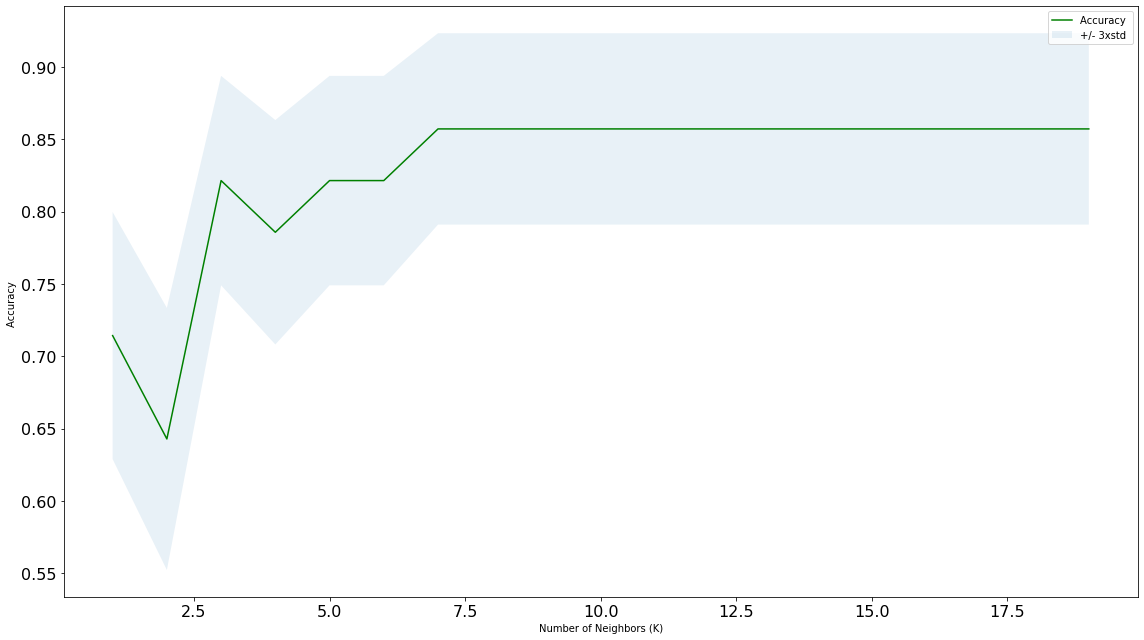

The best accuracy was with 0.8571428571428571 with k= 7


In [50]:
# Lte's find the best k value that gives the highest accuracy
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [51]:
# Let's try the KNN model again with the best k=6
k =  mean_acc.argmax()+1
#Train Model and Predict  
mussel_KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_KNN = mussel_KNN.predict(X_test)

In [52]:
# Let's calculate the train and test set accuracies 

print("KNN's Train set Accuracy: ", metrics.accuracy_score(y_train,  mussel_KNN.predict(X_train)))
print("KNN's Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_KNN))

print("KNN's Jaccard score:", jaccard_score(y_test, yhat_KNN, pos_label='YES'))
J_KNN = jaccard_score(y_test, yhat_KNN, pos_label='YES')

print("F1-score:", f1_score(y_test, yhat_KNN, average='weighted'))
F1_KNN = f1_score(y_test, yhat_KNN, average='weighted')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_KNN, labels=['YES','NO'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_KNN))

KNN's Train set Accuracy:  0.875
KNN's Test set Accuracy:  0.8571428571428571
KNN's Jaccard score: 0.75
F1-score: 0.8571428571428571
              precision    recall  f1-score   support

          NO       0.86      0.86      0.86        14
         YES       0.86      0.86      0.86        14

    accuracy                           0.86        28
   macro avg       0.86      0.86      0.86        28
weighted avg       0.86      0.86      0.86        28



Normalized confusion matrix
[[0.86 0.14]
 [0.14 0.86]]


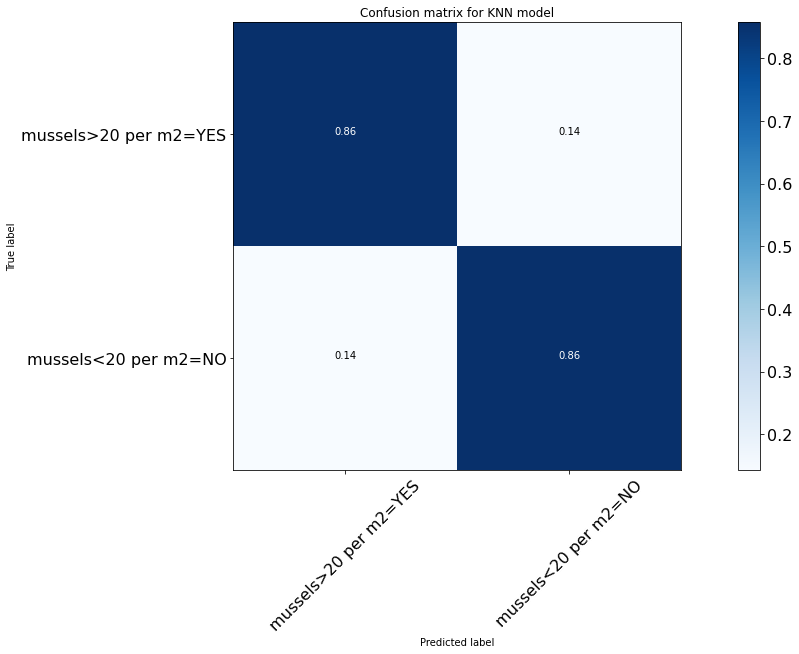

In [53]:
import itertools
#plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mussels>20 per m2=YES', 'mussels<20 per m2=NO'],normalize= True,  title='Confusion matrix for KNN model')
#plt.savefig('Fig2.jpg', dpi=300, bbox_inches='tight')

### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.externals.six import StringIO
from six import StringIO
import matplotlib.image as mpimg
from sklearn import tree

In [55]:
# prediction using descision tree model
musselTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
musselTree.fit(X_train,y_train)
predTree = musselTree.predict(X_test)

DecisionTrees's Train set Accuracy:  1.0
DecisionTrees's Test set Accuracy:  0.7857142857142857
DecisionTrees's Jaccard score: 0.6
DecisionTrees's F1-score: 0.78125
              precision    recall  f1-score   support

          NO       0.72      0.93      0.81        14
         YES       0.90      0.64      0.75        14

    accuracy                           0.79        28
   macro avg       0.81      0.79      0.78        28
weighted avg       0.81      0.79      0.78        28

Normalized confusion matrix
[[0.64 0.36]
 [0.07 0.93]]


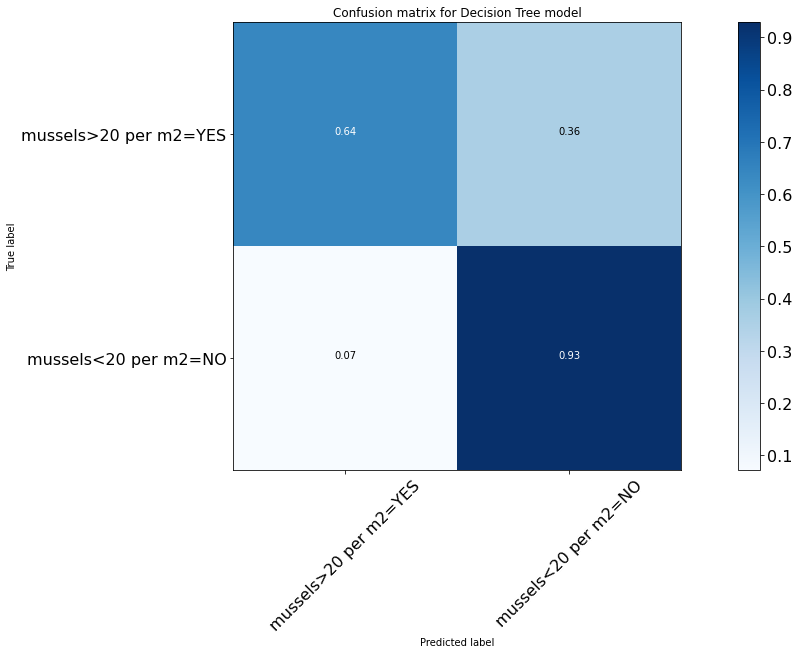

In [56]:
# Evaluation of the accuracy of training and test data
print("DecisionTrees's Train set Accuracy: ", metrics.accuracy_score(y_train, musselTree.predict(X_train)))
print("DecisionTrees's Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))

print("DecisionTrees's Jaccard score:", jaccard_score(y_test, predTree, pos_label='YES'))
J_tree = jaccard_score(y_test, predTree, pos_label='YES')

print("DecisionTrees's F1-score:", f1_score(y_test, predTree, average='weighted'))
F1_tree = f1_score(y_test, predTree, average='weighted')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=['YES','NO'])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree))
    
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mussels>20 per m2=YES', 'mussels<20 per m2=NO'],normalize= True,  title='Confusion matrix for Decision Tree model')
#plt.savefig('Fig2.jpg', dpi=300, bbox_inches='tight')

['NO', 'YES']


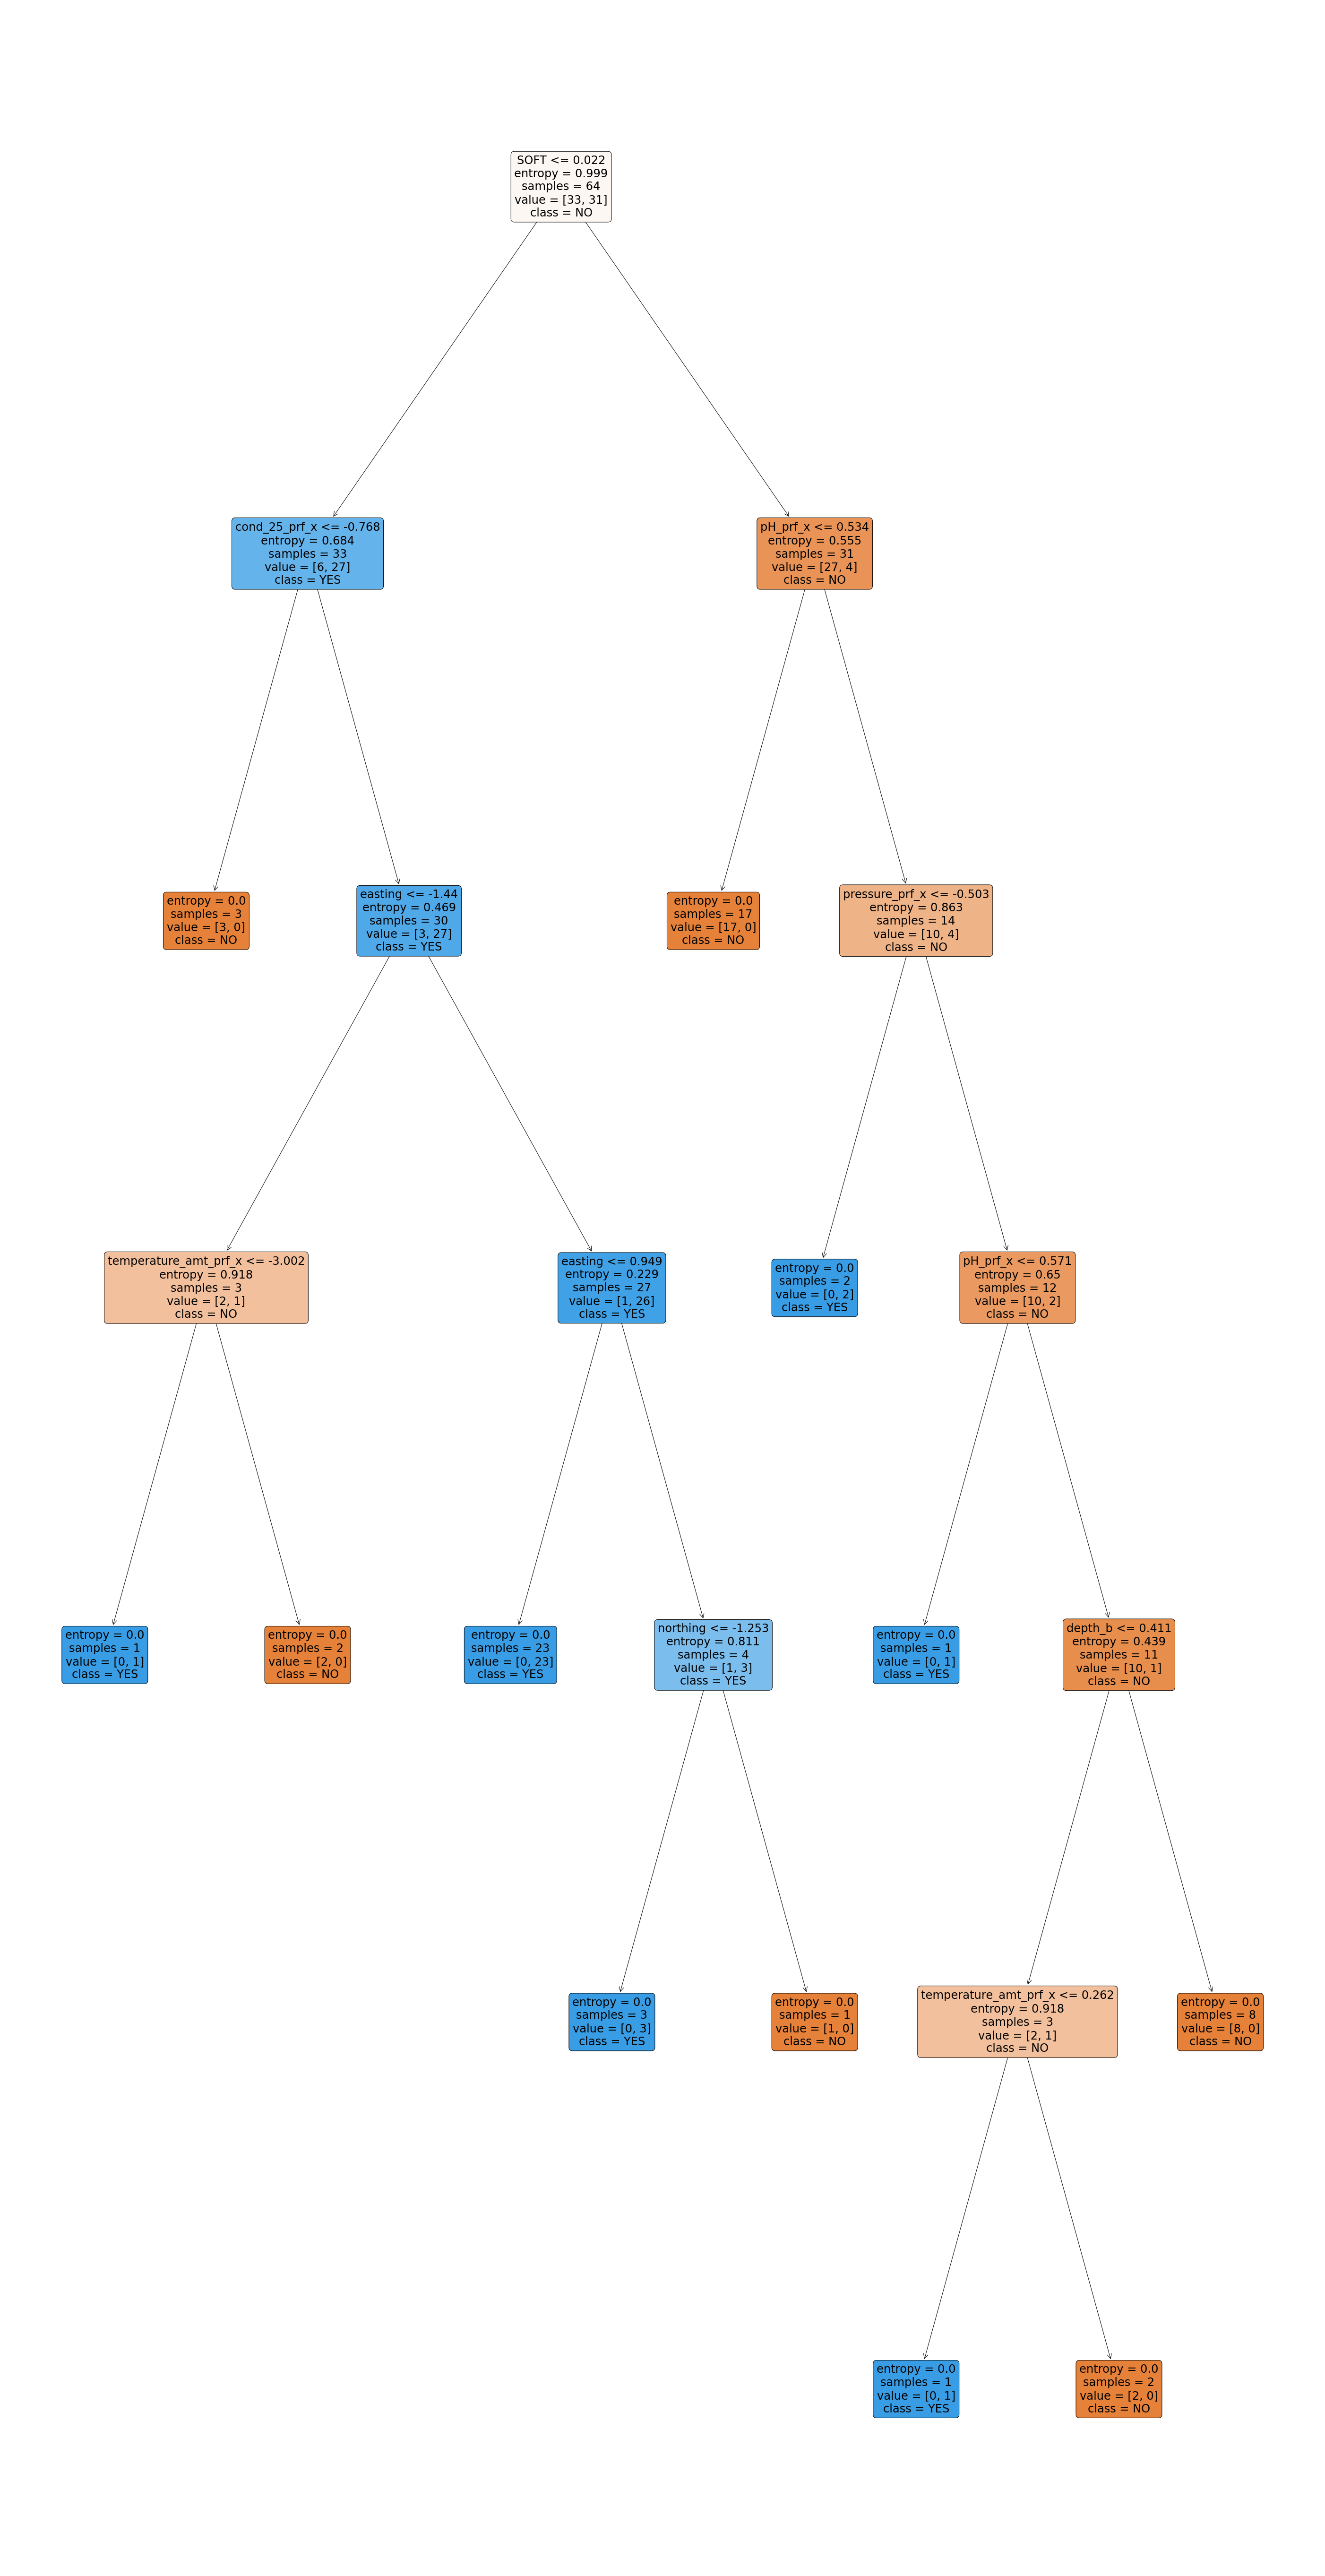

In [57]:
plt.figure(figsize=(50, 100))
featureNames =['northing', 'easting', 'secchi','depth_b', 'pressure_prf_x', 'pH_prf_x','cond_25_prf_x', 'turb_amt_prf_x', 'temperature_amt_prf_x', 'HARD', 'SOFT']
targetNames = df['mussel_availability'].unique().tolist()
print(targetNames)
out=tree.plot_tree(musselTree,feature_names=featureNames, 
               class_names=targetNames,
               filled=True, rounded=True)

In [58]:
#import pydotplus
#import matplotlib.image as mpimg
#from graphviz import Digraph
#dot_data = StringIO()
#filename = "loantree.png"
#featureNames = ['northing', 'easting', 'secchi', 'depth_b', 'pressure_prf_x',
#       'pH_prf_x', 'cond_25_prf_x', 'turb_amt_prf_x', 'temperature_amt_prf_x',
#       'substrate']
#targetNames = df['mussel_availability'].unique().tolist()
#out=tree.export_graphviz(musselTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png(filename)
#img = mpimg.imread(filename)
#plt.figure(figsize=(100, 200))
#plt.imshow(img,interpolation='nearest')

### Support Vector Machine (SVM)

In [59]:
from sklearn import svm

In [60]:
mussel_SVM = svm.SVC(kernel='rbf')
mussel_SVM.fit(X_train, y_train) 
yhat_SVM = mussel_SVM.predict(X_test)
yhat_SVM[0:5]

array(['YES', 'NO', 'NO', 'YES', 'NO'], dtype=object)

SVM's Train set Accuracy:  0.890625
SVM's Test set Accuracy:  0.8571428571428571
SVM's Jaccard score: 0.75
SVM's F1-score: 0.8571428571428571
              precision    recall  f1-score   support

          NO       0.86      0.86      0.86        14
         YES       0.86      0.86      0.86        14

    accuracy                           0.86        28
   macro avg       0.86      0.86      0.86        28
weighted avg       0.86      0.86      0.86        28

Normalized confusion matrix
[[0.86 0.14]
 [0.14 0.86]]


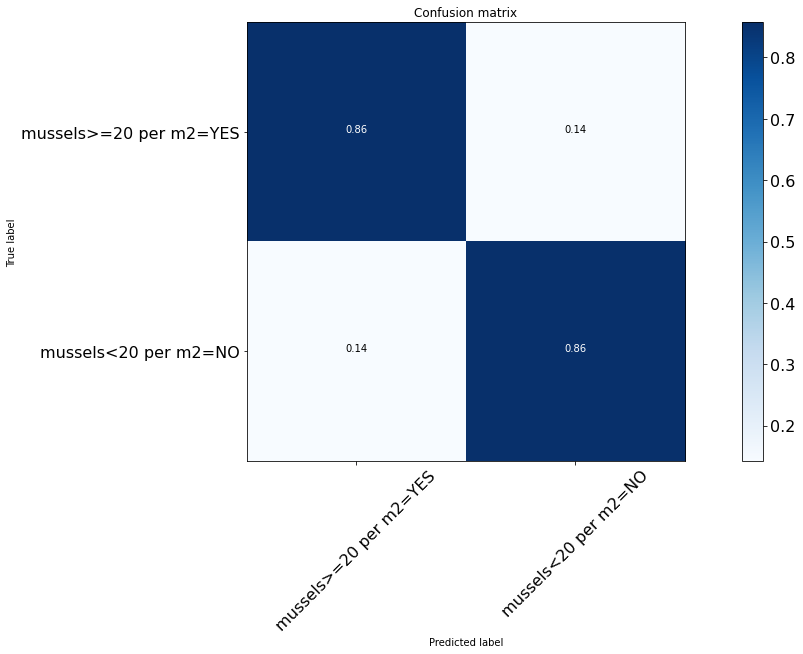

In [61]:
# Evaluation of the accuracy of training and test data
print("SVM's Train set Accuracy: ", metrics.accuracy_score(y_train, mussel_SVM.predict(X_train)))
print("SVM's Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_SVM))

print("SVM's Jaccard score:", jaccard_score(y_test, yhat_SVM, pos_label='YES'))
J_SVM=jaccard_score(y_test, yhat_SVM, pos_label='YES')

print("SVM's F1-score:", f1_score(y_test, yhat_SVM, average='weighted'))
F1_SVM= f1_score(y_test, yhat_SVM, average='weighted')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_SVM, labels=['YES', 'NO'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_SVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mussels>=20 per m2=YES', 'mussels<20 per m2=NO'],normalize= True,  title='Confusion matrix')

In [62]:
#plt.rcParams["figure.figsize"] = (16,9)
#plt.rc('xtick',labelsize=16)
#plt.rc('ytick',labelsize=16)
#pd.Series(abs(mussel_SVM.coef_[0]), index=Feature.columns).nlargest(20).plot(kind='barh')
#plt.savefig('MUSSELS_SVM_features.jpg', bbox_inches='tight')

In [63]:
#data.drop(['mussel_availability'], axis = 1).columns.values


In [64]:
XX=data.drop(['mussel_availability', 'D_all_num_m2'], axis = 1).values
YY=data['mussel_availability']
#XX =  preprocessing.StandardScaler().fit(XX).transform(XX)
XX[0:5]

array([[5.00e+06, 5.72e+05, 3.60e+00, 6.90e+00, 3.30e+00, 8.08e+00,
        1.35e+02, 7.24e-01, 2.19e+01, 0.00e+00, 1.00e+00],
       [4.97e+06, 5.88e+05, 4.50e+00, 1.23e+01, 5.96e+00, 8.37e+00,
        1.69e+02, 7.01e-01, 2.16e+01, 0.00e+00, 1.00e+00],
       [5.02e+06, 5.60e+05, 5.40e+00, 6.10e+00, 3.26e+00, 8.31e+00,
        1.58e+02, 6.44e-01, 2.16e+01, 0.00e+00, 1.00e+00],
       [5.00e+06, 5.66e+05, 8.00e+00, 1.78e+01, 9.74e+00, 7.96e+00,
        1.83e+02, 1.69e-01, 1.73e+01, 1.00e+00, 0.00e+00],
       [5.00e+06, 5.71e+05, 4.20e+00, 4.13e+00, 2.14e+00, 7.94e+00,
        1.43e+02, 5.12e-01, 1.95e+01, 1.00e+00, 0.00e+00]])

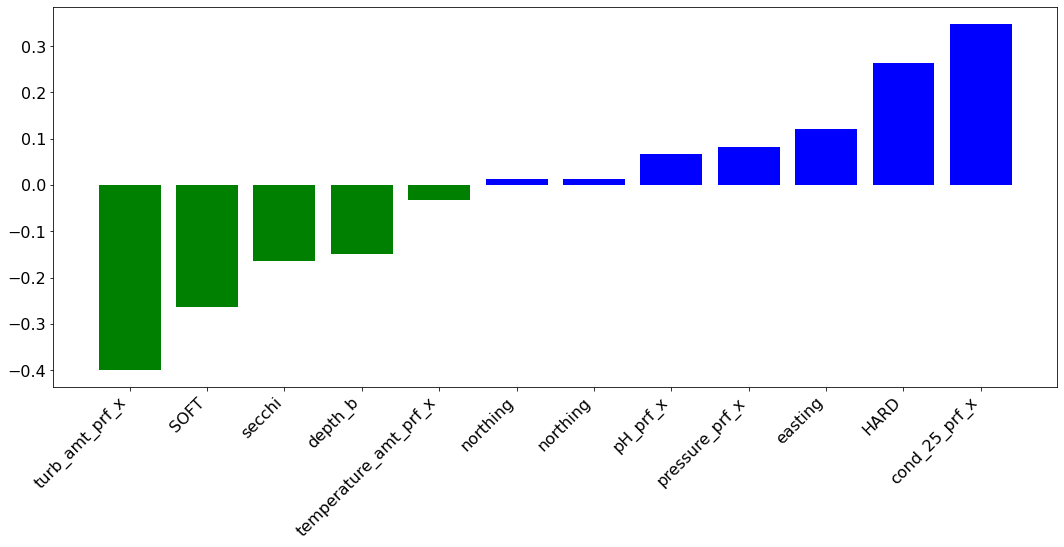

In [65]:
#from sklearn.svm import LinearSVC, SVC
def feature_plot(classifier, feature_names, top_features=6):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange( 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.savefig('MUSSELS_SVM_featuresRanking.png', bbox_inches='tight')
 plt.show()

# print(data.drop(['mussel_availability', 'D_all_num_m2'], axis = 1).columns.values)
#clf=svm.SVC(kernel='linear')
trainedsvm =  svm.LinearSVC().fit(X_train, y_train)

plt.rcParams["figure.figsize"] = (16,9)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
#feature_plot(trainedsvm, data.drop(['mussel_availability', 'D_all_num_m2', 'substrate_type', 'easting', 'northing'], axis = 1).columns.values)
feature_plot(trainedsvm, data.drop(['mussel_availability', 'D_all_num_m2'], axis = 1).columns.values)



### Logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [67]:
mussel_LR = LogisticRegression(C=0.01, solver='liblinear', multi_class='ovr').fit(X_train,y_train)
yhat_LR = mussel_LR.predict(X_test)
yhat_prob_LR = mussel_LR.predict_proba(X_test)

In [68]:
# get importance
#importance = mussel_LR.coef_[0]
## summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))
## plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

LogisticRegression's Train set Accuracy:  0.84375
LogisticRegression's Test set Accuracy:  0.8571428571428571
LogisticRegression's Jaccard score: 0.75
LogisticRegression's F1-score: 0.8571428571428571
LogisticRegression's LogLoss: 0.545768628310568
              precision    recall  f1-score   support

          NO       0.86      0.86      0.86        14
         YES       0.86      0.86      0.86        14

    accuracy                           0.86        28
   macro avg       0.86      0.86      0.86        28
weighted avg       0.86      0.86      0.86        28

Normalized confusion matrix
[[0.86 0.14]
 [0.14 0.86]]


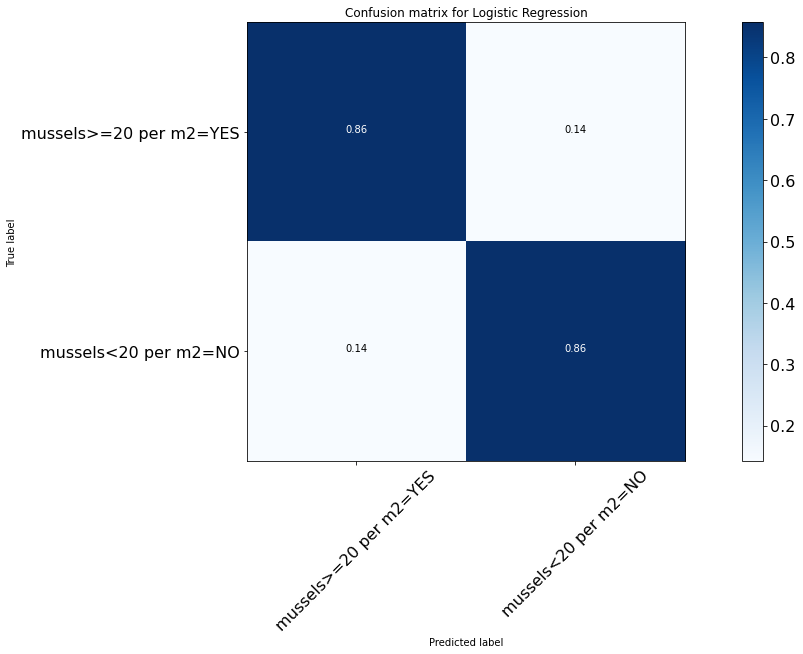

In [69]:
# Evaluation of the accuracy of training and test data
print("LogisticRegression's Train set Accuracy: ", metrics.accuracy_score(y_train, mussel_LR.predict(X_train)))
print("LogisticRegression's Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_LR))

print("LogisticRegression's Jaccard score:", jaccard_score(y_test, yhat_LR, pos_label='YES'))
J_LR=jaccard_score(y_test, yhat_LR,pos_label='YES' )

print("LogisticRegression's F1-score:", f1_score(y_test, yhat_LR, average='weighted'))
F1_LR=f1_score(y_test, yhat_LR, average='weighted')

print("LogisticRegression's LogLoss:", log_loss(y_test, yhat_prob_LR))
LL=log_loss(y_test, yhat_prob_LR)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=['YES','NO'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_LR))


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  classes=['mussels>=20 per m2=YES', 'mussels<20 per m2=NO'],normalize= True,  title='Confusion matrix for Logistic Regression')

## Concluding remarks

In [70]:
Algorithm=["KNN","Decision Tree", "SVM", "LogisticRegression"]
Jaccard=[J_KNN, J_tree, J_SVM, J_LR]
F1_score=[F1_KNN, F1_tree, F1_SVM, F1_LR]
LogLoss= ["NA", "NA", "NA", LL]
acc=pd.DataFrame({'Algorithm':Algorithm[:],'Jaccard': Jaccard[:], 'F1-score': F1_score[:], 'LogLoss': LogLoss[:] })
acc.set_index('Algorithm')

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.75,0.857143,NA
Decision Tree,0.60,0.781250,NA
SVM,0.75,0.857143,NA
LogisticRegression,0.75,0.857143,0.545769


Normalized confusion matrix
[[0.86 0.14]
 [0.14 0.86]]
Normalized confusion matrix
[[0.64 0.36]
 [0.07 0.93]]
Normalized confusion matrix
[[0.86 0.14]
 [0.14 0.86]]
Normalized confusion matrix
[[0.86 0.14]
 [0.14 0.86]]


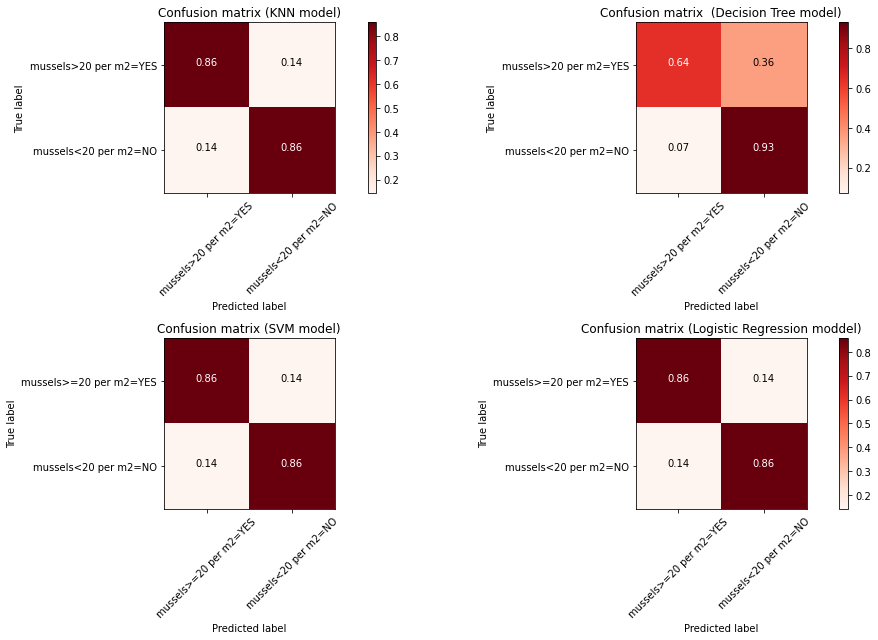

In [71]:
#Make a figure showing the four confusion matrices
plt.rcParams["figure.figsize"] = (16,9)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

#1 - KNN
plt.subplot(2,2,1)
cnf_matrix = confusion_matrix(y_test, yhat_KNN, labels=['YES','NO'])
plot_confusion_matrix(cnf_matrix, classes=['mussels>20 per m2=YES', 'mussels<20 per m2=NO'], normalize= True,  title='Confusion matrix (KNN model)', cmap=plt.cm.Reds)

#2 - Decision Tree
plt.subplot(2,2,2)
cnf_matrix = confusion_matrix(y_test, predTree, labels=['YES','NO'])
plot_confusion_matrix(cnf_matrix, classes=['mussels>20 per m2=YES', 'mussels<20 per m2=NO'], normalize= True,  title='Confusion matrix  (Decision Tree model)', cmap=plt.cm.Reds)


#3 - Support Vector Machine
plt.subplot(2,2,3)
cnf_matrix = confusion_matrix(y_test, yhat_SVM, labels=['YES', 'NO'])
plot_confusion_matrix(cnf_matrix, classes=['mussels>=20 per m2=YES', 'mussels<20 per m2=NO'], normalize= True,  title='Confusion matrix (SVM model)', cmap=plt.cm.Reds)

#4 - Logistic regression
plt.subplot(2,2,4)
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=['YES','NO'])
plot_confusion_matrix(cnf_matrix,  classes=['mussels>=20 per m2=YES', 'mussels<20 per m2=NO'], normalize= True,  title='Confusion matrix (Logistic Regression moddel)', cmap=plt.cm.Reds)

plt.savefig('Fig_confusion_matrix_all.jpg', bbox_inches='tight')